In [1]:
import pandas as pd
import datetime
import pickle
import binascii

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from collections import Counter

In [11]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [2]:
!pip install Kqlmagic --no-cache-dir --upgrade


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


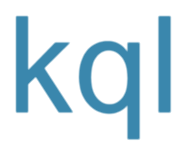

In [3]:
%reload_ext Kqlmagic

In [4]:
%kql kusto://code;cluster='Help';database='Samples'

<IPython.core.display.Javascript object>

In [3]:
# NOTE: to make hash() consistent set env. variable PYTHONHASHSEED=0
%env PYTHONHASHSEED=0

q = '''
OccupancyDetection
'''

fn = "df" + str(hash(q)) + ".pkl"
print("Cache file name: ", fn)

env: PYTHONHASHSEED=0
Cache file name:  df2659477725914994429.pkl


In [4]:
fn = "df" + str(hash(q)) + ".pkl"
try:
    df = pd.read_pickle(fn)
    print("Load df from " + fn)
except:
    print("Execute query...")
    try:
        %kql res << -query q
        df = res.to_dataframe()
        print("Save df to " + fn)
        df.to_pickle(fn)
        print("\n", df.shape, "\n", df.columns)
    except Exception as ex:
        print(ex)

Execute query...
Line magic function `%kql` not found.


In [5]:
print(df.shape, "\n")
print(df[-4:])

NameError: name 'df' is not defined

In [20]:
train_x = df[df['Test'] == False][['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
train_y = df[df['Test'] == False]['Occupancy']
test_x = df[df['Test'] == True][['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
test_y = df[df['Test'] == True]['Occupancy']

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(8143, 5) (8143,) (12417, 5) (12417,)


In [21]:
columns = ["Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
    


target = ["Occupancy"]

In [22]:
Occupancy =df["Occupancy"].tolist()
Occupancy

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [2]:
df = df.loc[:,columns].copy()

# Drop the null columns where all values are null
occupancy_df = df.dropna(axis='columns', how='all')

# Drop the null rows
occupancy_df = df.dropna()

# Convert the target column values to low_Earners and high_Earners based on their values
#x = {'Current': 'low_earner'}   
#df = df.replace(x)
   
#x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_earner')    
#df = df.replace(x)

#df.reset_index(inplace=True, drop=True)




occupancy_df.head()

NameError: name 'df' is not defined

In [25]:
X = occupancy_df.drop(["Occupancy"], axis=1)

X = pd.get_dummies(X)

# Create our target
y = occupancy_df["CO2"]

In [26]:
X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228
std,1.055315,4.982154,210.430875,311.201281,0.000768
min,19.000000,16.745000,0.000000,412.750000,0.002674
25%,20.200000,24.500000,0.000000,460.000000,0.003719
50%,20.700000,27.290000,0.000000,565.416667,0.004292
75%,21.525000,31.290000,301.000000,804.666667,0.004832
max,24.408333,39.500000,1697.250000,2076.500000,0.006476


In [27]:
X.shape

(20560, 5)

In [28]:
# Check the balance of our target values
y.value_counts()

439.00     139
438.00     134
437.00     133
435.00     129
441.00     118
          ... 
1061.80      1
1065.25      1
1045.20      1
1049.60      1
1864.00      1
Name: CO2, Length: 5167, dtype: int64

In [29]:
# splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(16448, 5) (4112, 5) (16448,) (4112,)


In [31]:
print(y_train.shape)

(16448,)


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
random_forest = RandomForestRegressor(n_estimators = 25, random_state =25)

In [35]:
#Fitting the model
CO2_rf= random_forest.fit(X_train, y_train)

In [36]:
#Training model evaluation

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [38]:
# The training r_sq
print('The training r_sq is: %.2f'% CO2_rf.score(X_train, y_train))

The training r_sq is: 1.00


In [39]:
# Prediction on the training dataset
ytrain_pred = CO2_rf.predict(X_train)

In [40]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

The MAE is: 0.03


In [41]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

The MSE is: 0.02


In [42]:
# THe RMSE
import numpy as np
print('The RME is %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RME is 0.15


In [43]:
# The EVS 
print('The EVS is: %.2f'% explained_variance_score(y_train, ytrain_pred))

The EVS is: 1.00


In [44]:
#Prediction on the testing data
ytest_pred = CO2_rf.predict(X_test)

In [45]:
print(ytest_pred[:10])

[ 442.75       463.        1167.498      471.         454.
  581.6706667  572.         546.5        674.7        465.       ]


In [46]:
#The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, ytest_pred))

The testing r_sq is: 1.00


In [48]:
# Or
print('The testing r_sq is: %.2f'% CO2_rf.score(X_test, y_test))

The testing r_sq is: 1.00


In [49]:
# The metrics

In [50]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))

The MAE is: 0.06


In [51]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

The MSE is: 0.05


In [52]:
# The RMSE
print('The RMSE:',np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE: 0.2211034591377948


In [53]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, ytest_pred))

The EVS is: 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

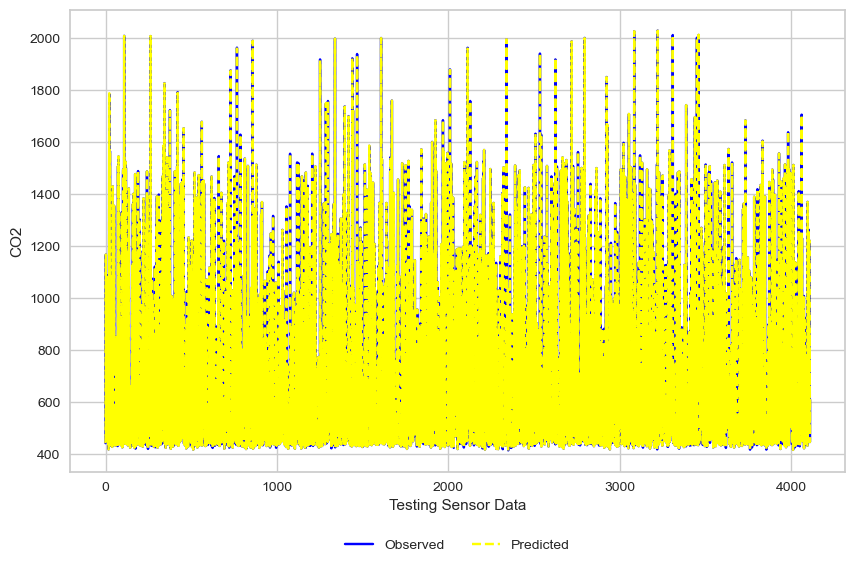

In [76]:
#Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] =(10,6)
x_ax = range(len(X_test))
#Plotting
plt.plot(x_ax, y_test, label = 'Observed', color ='blue', linestyle ='-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color ='yellow', linestyle = '--')
plt.ylabel('CO2')
plt.xlabel('Testing Sensor Data')
plt.legend(bbox_to_anchor =(0.5, -0.2), loc ='lower center', ncol =2, frameon = False)
plt.show

In [57]:
!pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 276.8 kB/s eta 0:00:00


In [55]:
#Plotting the prediction errors and residuals using yellowbrick
# Anaconda/Cmd prompt and type : pip install yellowbrick

0.9999994894606992

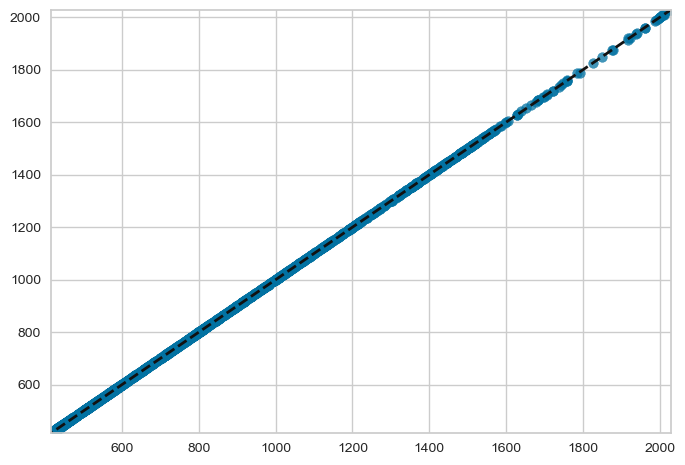

In [59]:
#Plotting the prediction errors
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
#from yellowbrick.regressor import proof
visualizer = PredictionError(CO2_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

0.9999994894606992

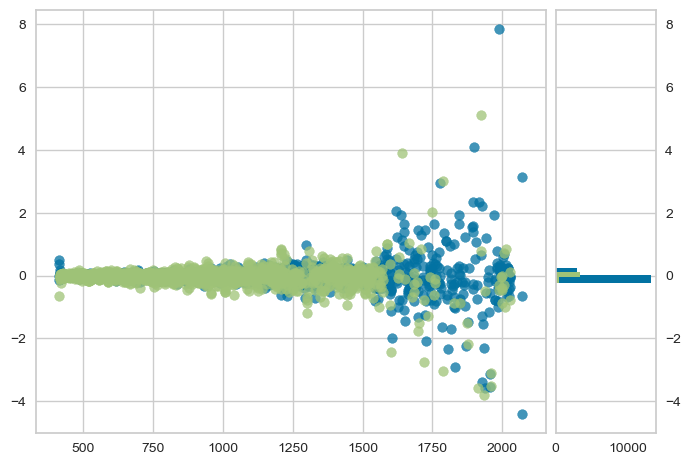

In [60]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
#from yellowbrick.regressor import proof
visualizer = ResidualsPlot(CO2_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

In [61]:
# The k-folds CV
from sklearn.model_selection import cross_val_score

In [62]:
seed =7

In [63]:
# Training model CV
score_train = cross_val_score(CO2_rf, X_train, y_train, scoring ="neg_mean_squared_error", cv=10)

In [64]:
score_train

array([-0.0775002 , -0.12239354, -0.12914788, -0.05430465, -0.0957513 ,
       -0.12327318, -0.45970743, -0.10019133, -0.04867723, -0.07022913])

In [65]:
# The mean score
print(np.mean(score_train))

-0.1281175870614962


In [66]:
# The  absolutevmean score
from numpy import absolute
print(absolute(np.mean(score_train)))

0.1281175870614962


In [67]:
# The testing model CV
score_test = cross_val_score(CO2_rf,X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)

In [68]:
score_test

array([-0.85848049, -2.11893728, -1.72827117, -2.23011406, -0.49389204,
       -0.98306362, -1.59691871, -2.4440461 , -2.86958814, -0.44248991])

In [69]:
print(absolute(np.mean(score_test)))

1.5765801514121374


In [70]:
# Random Forest Feature Ranking
#import pandas as pd
from sklearn.pipeline import Pipeline

In [72]:
f_list = list(X.columns)
f_importance = pd.Series(CO2_rf.feature_importances_,index= f_list).sort_values(ascending =False)

In [73]:
print(f_importance)

CO2              0.999990
HumidityRatio    0.000003
Humidity         0.000003
Temperature      0.000002
Light            0.000002
dtype: float64


In [74]:
# List the features sorted in descending order by feature importance
feature_names = X.columns
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.9999899713855431, 'CO2'),
 (3.2277325312611902e-06, 'HumidityRatio'),
 (3.033732652354305e-06, 'Humidity'),
 (2.095172396760104e-06, 'Temperature'),
 (1.6719768764653015e-06, 'Light')]